# Logistic Regression - Customer Churn Prediction

# Directory, libraries, data

In [1]:
%cd C:/Users/shrav/Data_Analysis_Projects/Datasets/Logistic Regression

C:\Users\shrav\Data_Analysis_Projects\Datasets\Logistic Regression


In [2]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# data 
df = pd.read_csv('customer_churn_dataset.csv')
df.head()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Support_Calls,Contract_Type,Payment_Method,Has_Additional_Services,Churn
0,1,56,38,112.48,61.87,8,Two Year,Debit Card,1,0
1,2,69,28,174.51,310.65,6,Two Year,Debit Card,1,0
2,3,46,48,35.11,310.02,1,Month-to-Month,UPI,1,0
3,4,32,38,123.14,434.93,7,One Year,PayPal,0,0
4,5,60,31,95.38,286.54,1,Month-to-Month,Credit Card,0,1


# Data Analysis

In [4]:
# Check for null values 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  10000 non-null  int64  
 1   Age                         10000 non-null  int64  
 2   Subscription_Length_Months  10000 non-null  int64  
 3   Monthly_Bill                10000 non-null  float64
 4   Total_Usage_GB              10000 non-null  float64
 5   Support_Calls               10000 non-null  int64  
 6   Contract_Type               10000 non-null  object 
 7   Payment_Method              10000 non-null  object 
 8   Has_Additional_Services     10000 non-null  int64  
 9   Churn                       10000 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 781.4+ KB


In [5]:
df.describe().round(2)

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Support_Calls,Has_Additional_Services,Churn
count,10000.00,10000.00,10000.0,10000.00,10000.00,10000.00,10000.00,10000.00
mean,5000.50,46.17,29.9,104.68,252.48,4.54,0.51,0.21
std,2886.90,16.42,17.0,54.67,144.00,2.88,0.50,0.41
min,1.00,18.00,1.0,10.00,0.51,0.00,0.00,0.00
25%,2500.75,32.00,15.0,57.58,128.99,2.00,0.00,0.00
50%,5000.50,46.00,29.0,104.54,253.15,5.00,1.00,0.00
75%,7500.25,61.00,45.0,151.25,377.49,7.00,1.00,0.00
max,10000.00,74.00,59.0,199.98,499.99,9.00,1.00,1.00


<Axes: >

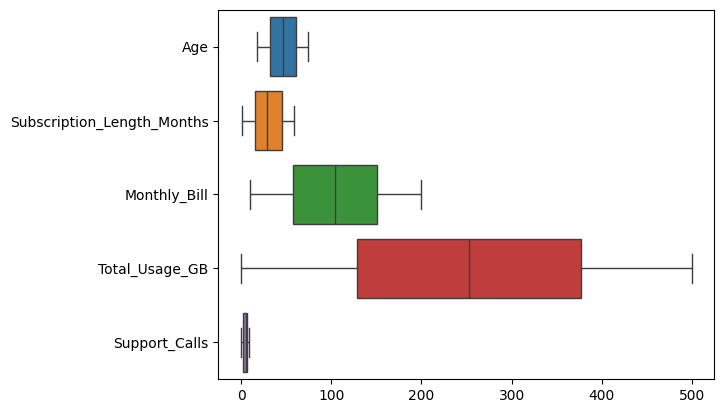

In [6]:
# Check for Outliers 
sns.boxplot(df.loc[:, ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Support_Calls']], 
           orient='h')

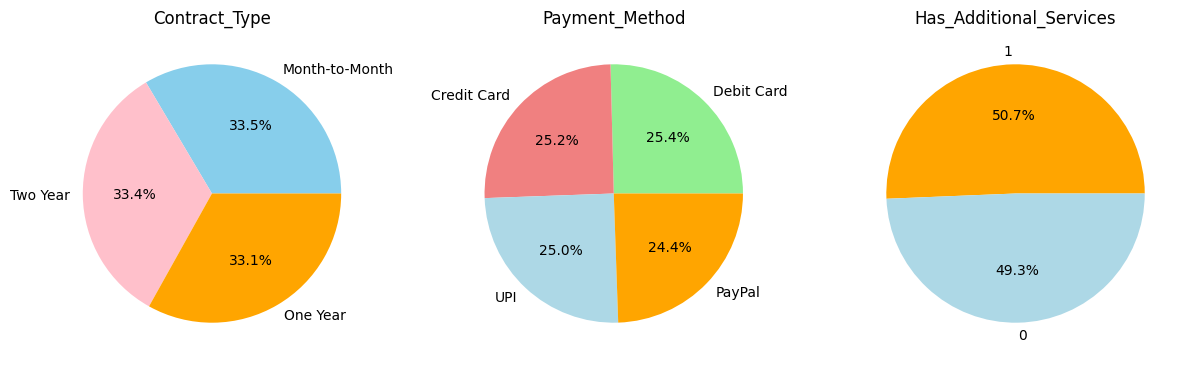

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Contract Type distribution
df['Contract_Type'].value_counts().plot.pie(ax=axes[0], autopct='%1.1f%%', colors=['skyblue', 'pink', 'orange'])
axes[0].set_title('Contract_Type')
axes[0].set_ylabel('') 

# Payment Type distribution
df['Payment_Method'].value_counts().plot.pie(ax=axes[1], autopct='%1.1f%%', 
                                             colors=['lightgreen', 'lightcoral', 'lightblue', 'orange'])
axes[1].set_title('Payment_Method')
axes[1].set_ylabel('')

# Services Type distribution
df['Has_Additional_Services'].value_counts().plot.pie(ax=axes[2], autopct='%1.1f%%', colors=['orange', 'lightblue'])
axes[2].set_title('Has_Additional_Services')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

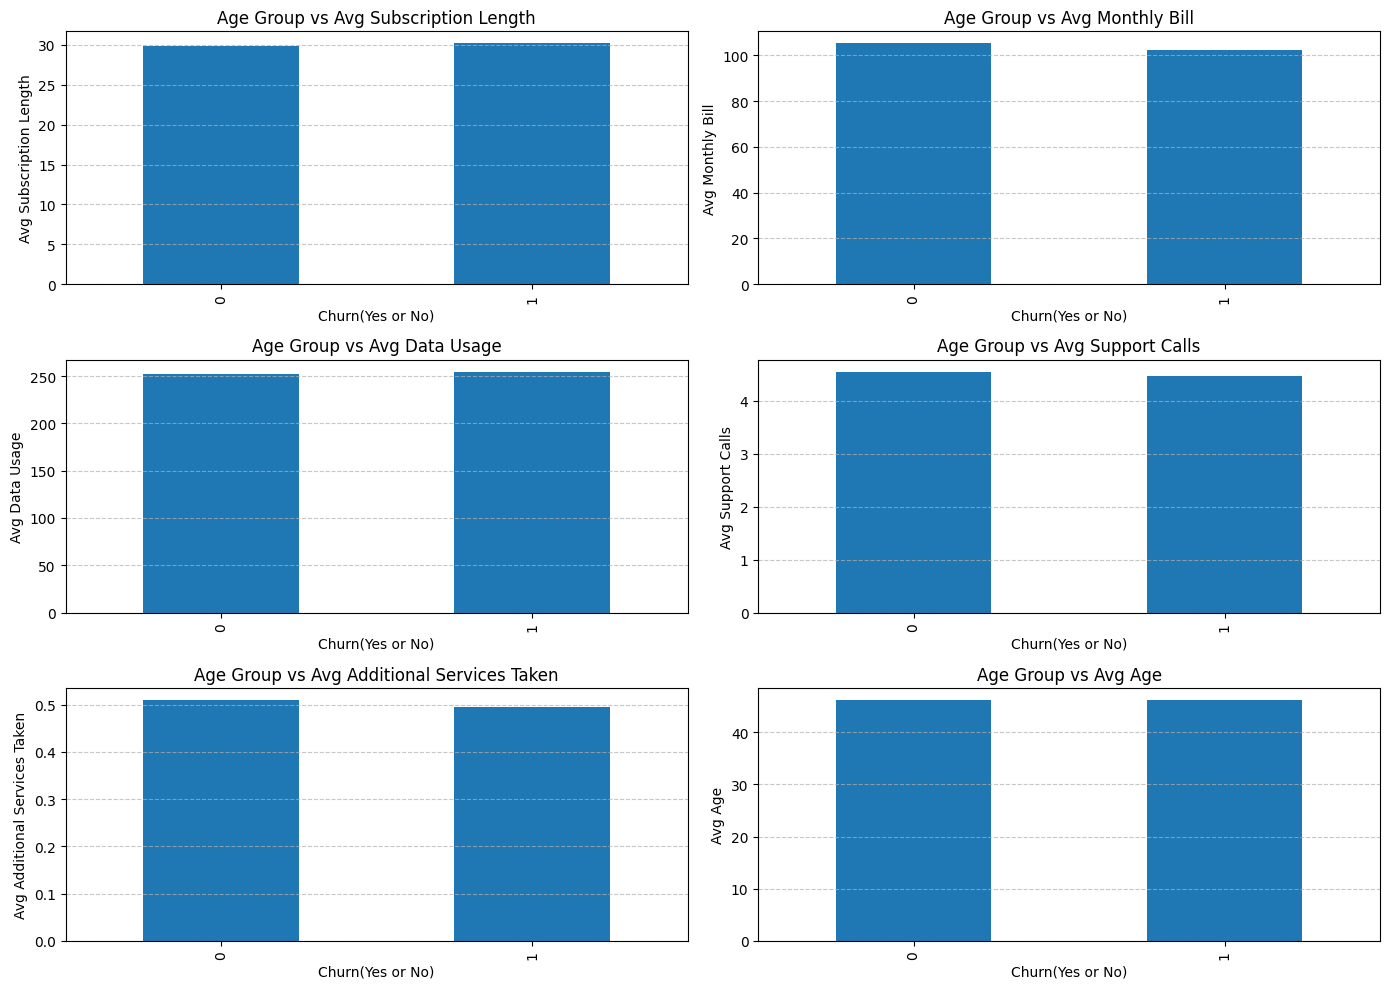

In [9]:
# columns for plot
cols = ["Subscription_Length_Months", "Monthly_Bill", "Total_Usage_GB", 
        "Support_Calls", "Has_Additional_Services", "Age"]
y_label = ["Avg Subscription Length", "Avg Monthly Bill", "Avg Data Usage",
           "Avg Support Calls", "Avg Additional Services Taken", "Avg Age"]

num_of_plots = len(cols)
n_cols = 2
n_rows = (num_of_plots + n_cols - 1) // n_cols  # Ensure enough rows

fig, axs = plt.subplots(n_rows, n_cols, figsize=(14, 10))
axs = axs.flatten()  # Flatten for easy iteration

for i in range(num_of_plots):
    avg_metric = df.groupby("Churn")[cols[i]].mean()
    avg_metric.plot(kind='bar', ax=axs[i])

    axs[i].set_title(f'Age Group vs {y_label[i]}')
    axs[i].set_xlabel("Churn(Yes or No)")
    axs[i].set_ylabel(y_label[i])
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# Correlation Check 

<Axes: >

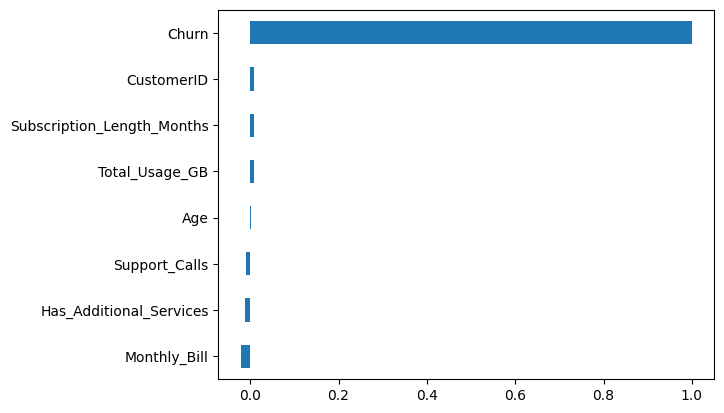

In [10]:
df.corr(numeric_only=True)['Churn'].sort_values().plot(kind='barh')

<Axes: >

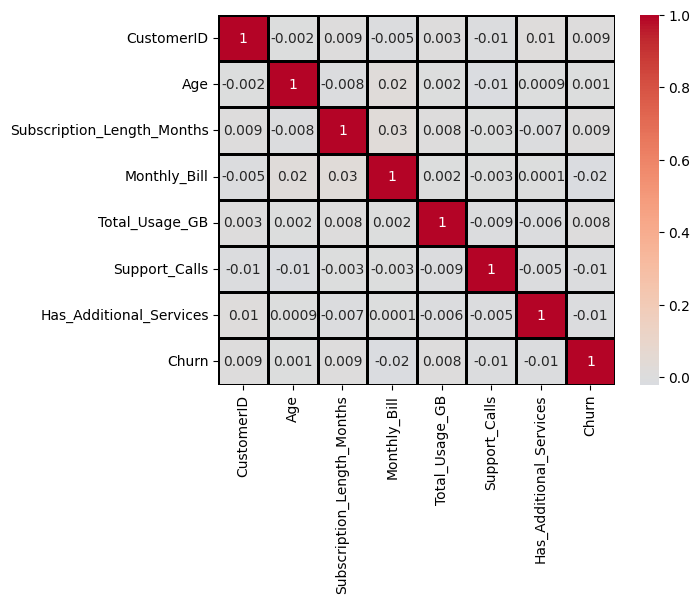

In [11]:
sns.heatmap(df.corr(numeric_only=True),
           annot=True,
           fmt='.1g',
           center=0,
           cmap='coolwarm',
           linewidths=1,
           linecolor='black') 

# Logistic Regression Prep

In [12]:
df = pd.get_dummies(df, drop_first=True, dtype=int)
df.head(1)

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Support_Calls,Has_Additional_Services,Churn,Contract_Type_One Year,Contract_Type_Two Year,Payment_Method_Debit Card,Payment_Method_PayPal,Payment_Method_UPI
0,1,56,38,112.48,61.87,8,1,0,0,1,1,0,0


# Isolate X and y

In [13]:
X = df.drop(columns=['CustomerID', 'Churn'])
y = df.Churn

In [14]:
# Adding a constant 
X = sm.add_constant(X)
X.head(2)

,const,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Support_Calls,Has_Additional_Services,Contract_Type_One Year,Contract_Type_Two Year,Payment_Method_Debit Card,Payment_Method_PayPal,Payment_Method_UPI
0,1.0,56,38,112.48,61.87,8,1,0,1,1,0,0
1,1.0,69,28,174.51,310.65,6,1,0,1,1,0,0


# Test train split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model

In [16]:
model = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.515514
         Iterations 5


In [17]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7988
Method:                           MLE   Df Model:                           11
Date:                Tue, 29 Apr 2025   Pseudo R-squ.:                0.001774
Time:                        12:15:58   Log-Likelihood:                -4124.1
converged:                       True   LL-Null:                       -4131.4
Covariance Type:            nonrobust   LLR p-value:                    0.1988
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.1916      0.143     -8.341      0.000      -1.472      -0.912
Age                            0.0014      0.002      0.813      0.416      -0.002 

# Predictions

In [18]:
prediction = model.predict(X_test)
prediction = np.where(prediction > 0.5, 1, 0)
prediction[:5]

array([0, 0, 0, 0, 0])

In [19]:
y_test.mean()  # if < 0.3 then unbalanced

0.206

# Confusion matrix

In [20]:
# confusion matrix 
print(confusion_matrix(y_test, prediction))
tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()

[[1588    0]
 [ 412    0]]


# Classification report 

In [21]:
# classification report 

print(classification_report(y_test, prediction, zero_division=0))

              precision    recall  f1-score   support

           0       0.79      1.00      0.89      1588
           1       0.00      0.00      0.00       412

    accuracy                           0.79      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.79      0.70      2000

